In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/marking_hack/out_data.csv')

In [ ]:
data.head()

,dt,total
0,2021-11-22,4224950185
1,2021-11-23,4887946747
2,2021-11-24,4814967306
3,2021-11-25,5343075419
4,2021-11-26,7954615313


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dt      365 non-null    object
 1   total   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
data.describe()

,total
count,3.650000e+02
mean,5.007708e+09
std,3.143035e+09
min,1.467792e+09
25%,3.607643e+09
50%,4.185577e+09
75%,4.915375e+09
max,2.936637e+10


In [ ]:
data['dt'] = pd.to_datetime(data['dt'])

In [ ]:
data = data.set_index('dt').sort_index()

In [ ]:
data.head()

,total
dt,
2021-11-22,4224950185
2021-11-23,4887946747
2021-11-24,4814967306
2021-11-25,5343075419
2021-11-26,7954615313


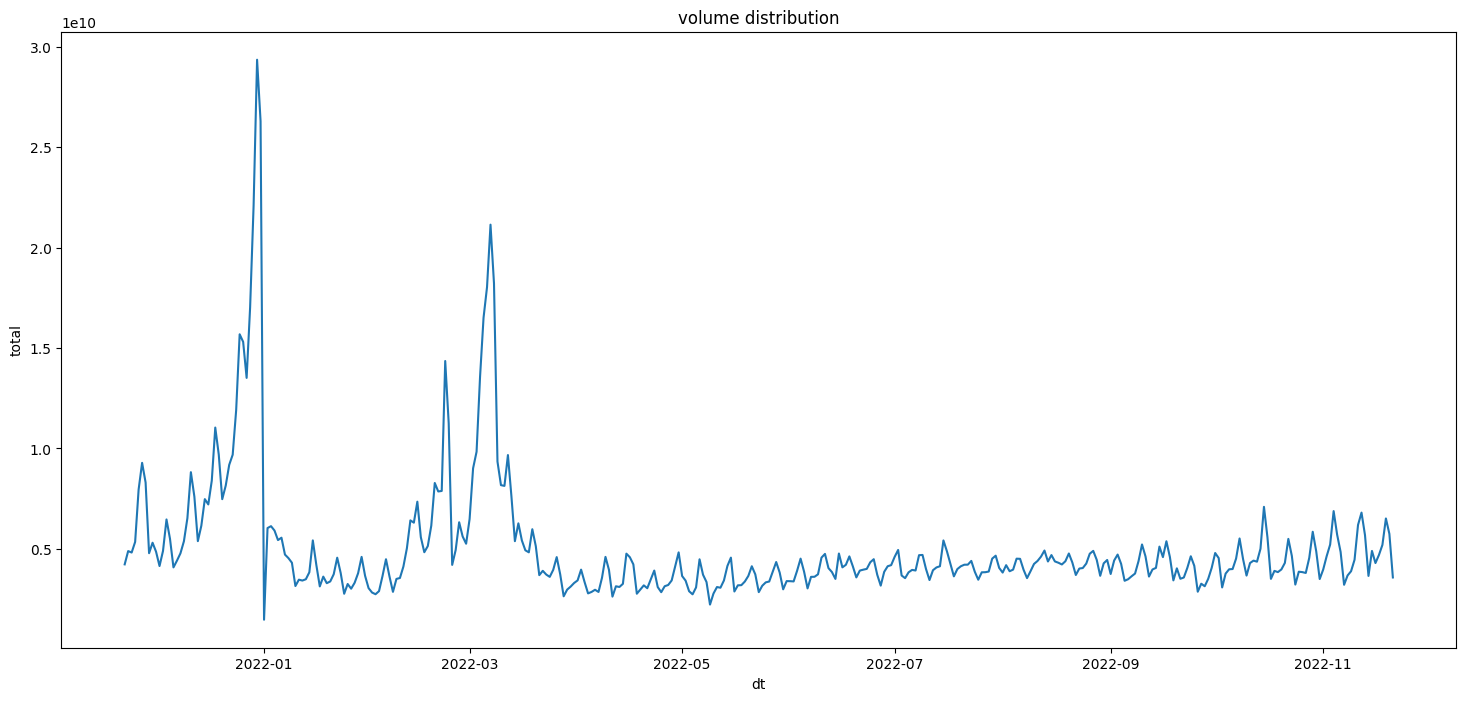

In [ ]:
plt.figure(figsize=(18, 8))

sns.lineplot(x=data.index, y=data['total'])
plt.title('volume distribution')

plt.show()

In [ ]:
def add_features(data, amount_of_lags=1, amount_of_sma=6, rolling_window=4, rolling_step=3):
    modified_data = data.copy()
    modified_data['day'] = data.index.day
    
    for i in range(1, amount_of_lags+1):
        modified_data['lag_{}'.format(i)] = modified_data['total'].shift(i)
        

    for i in range(amount_of_sma):
          col_name = 'moving_average_{}'.format(rolling_window+rolling_step*i)
          modified_data[col_name] = modified_data['total'].shift().rolling(rolling_window+rolling_step*i).mean()
    
    modified_data = modified_data.dropna()
    
    return modified_data
    

In [ ]:
lagged_data = add_features(data, 25, 10, 3, 3)

NameError: ignored

In [ ]:
lagged_data.shape

(340, 32)

In [ ]:
x = lagged_data.drop('total', axis=1)
y = lagged_data['total']

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, train_size=0.8)

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
model = LinearRegression()
scores = cross_val_score(model, x_train, y_train, cv=tscv, scoring='neg_root_mean_squared_error')
print(scores)
print('avg rmse:', -round(sum(scores) / len(scores), 2))

[-5.98573199e+09 -1.50287629e+09 -8.72865639e+08 -6.76760469e+08
 -4.62226142e+08]
avg rmse: 1900092106.84


In [ ]:
pred_median  = np.ones(y_test.shape) * y_test.median()
mean_squared_error(y_test, pred_median, squared=False)

960252138.4689686

In [ ]:
pred_last = y_test.shift(fill_value=y_train[-1])
mean_squared_error(y_test, pred_last, squared=False)

950264019.8297964

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predicted = model.predict(x_test)
mean_squared_error(y_test, y_predicted, squared=False)

908829333.308312